In [1]:
from gluonts.dataset.split import split

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (20, 3)

In [3]:
df = pd.read_csv('energy_data.csv', header=0, parse_dates=True)
df.head()

,time,target,item_id
0,2023-04-26 00:00:00,34.20,2023-01-06 A\n2023-01-06 A\n2023-01-06 ...
1,2023-04-26 00:01:00,34.06,2023-01-06 A\n2023-01-06 A\n2023-01-06 ...
2,2023-04-26 00:02:00,34.43,2023-01-06 A\n2023-01-06 A\n2023-01-06 ...
3,2023-04-26 00:03:00,34.09,2023-01-06 A\n2023-01-06 A\n2023-01-06 ...
4,2023-04-26 00:04:00,34.35,2023-01-06 A\n2023-01-06 A\n2023-01-06 ...


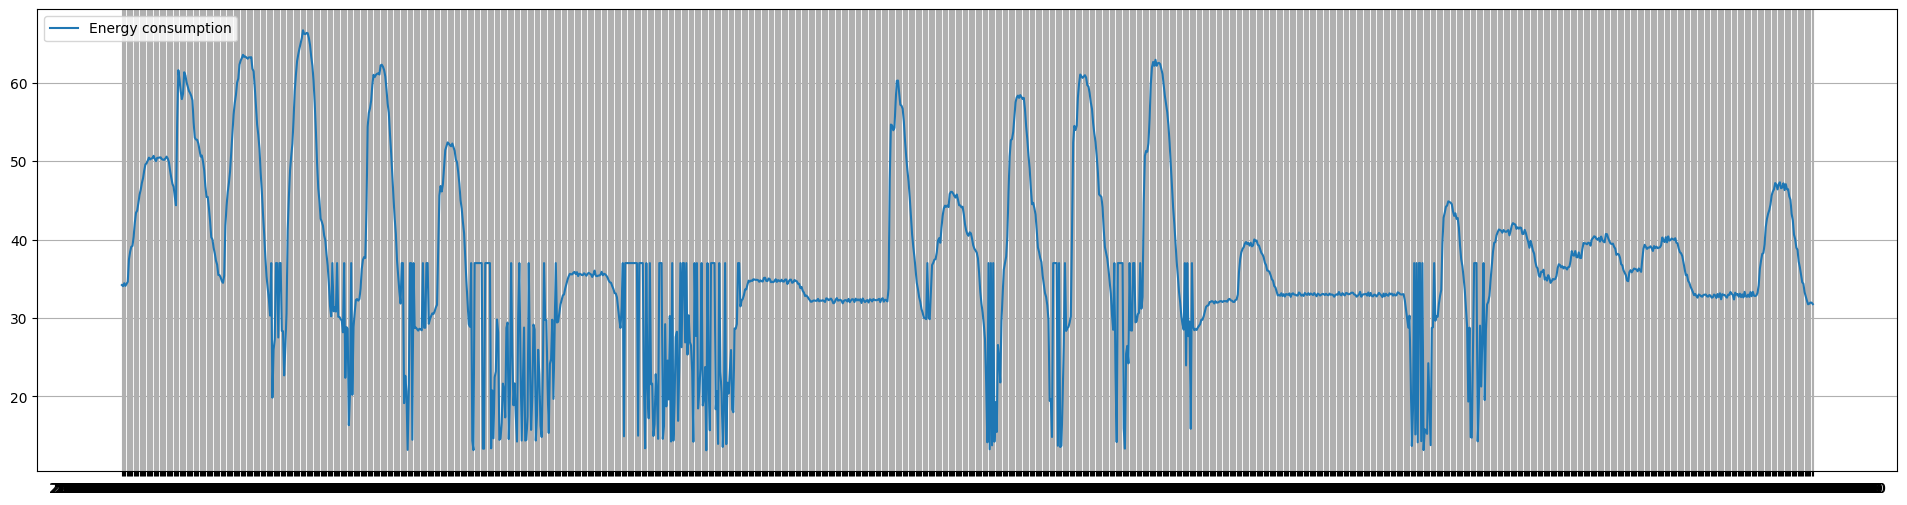

In [4]:
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(df['time'], df['target']);
plt.legend(["Energy consumption"], loc="upper left")
plt.show()

In [5]:
from gluonts.dataset.pandas import PandasDataset
df1 = PandasDataset.from_long_dataframe(df, target="target",item_id='item_id')

In [6]:
from gluonts.dataset.util import to_pandas
from gluonts.dataset.split import split


def highlight_entry(entry, color):
    start = entry["start"]
    end = entry["start"] + len(entry["target"])
    plt.axvspan(start, end, facecolor=color, alpha=0.2)


def plot_dataset_splitting(original_dataset, training_dataset, test_pairs):
    for original_entry, train_entry in zip(original_dataset, training_dataset):
        to_pandas(original_entry).plot()
        highlight_entry(train_entry, "red")
        plt.legend(["sub dataset", "training dataset"], loc="upper left")
        plt.show()

    for original_entry in original_dataset:
        for test_input, test_label in test_pairs:
            to_pandas(original_entry).plot()
            highlight_entry(test_input, "green")
            highlight_entry(test_label, "blue")
            plt.legend(["sub dataset", "test input", "test label"], loc="upper left")
            plt.show()

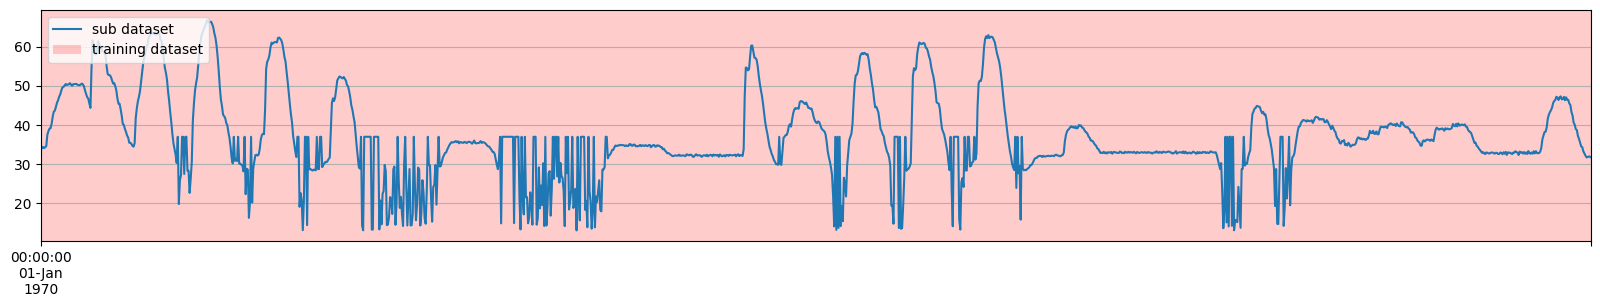

AssertionError: Not enough data to generate some of the windows; try splitting data at an earlier date

In [7]:
prediction_length = 3 * 24
training_dataset, test_template = split(
    df1, date=pd.Period("2023-01-06 00:00:00", freq="N")
)
test_pairs = test_template.generate_instances(
    prediction_length=prediction_length,
    windows=3,
    distance=24,
)

plot_dataset_splitting(df1, training_dataset, test_pairs)